# INET4061 Final Project Notebook
11/18/21

Adam Levy, Jeevan Prakash, Tyler Perkins

# Overview

In this notebook, we will train models to recognize digits from a dataset of hand-written digits called MNIST ("Modified National Institute of Standards and Technology") which has been used for benchmarking image classifiers. One potential business application of algorithmic identification of handwritten writing is the automatic digitization of handwritten documents. A model which can recognize human handwriting could be used to create a program that takes handwritten documents as input and returns a digitized document such as a PDF as output. There are many applications for this technology, such as converting student handwriting on exams to a digital format so that answers can be more easily read and graded by the proctor. MNIST is known as a "hello world" dataset because it's very basic. Each image is 28 by 28 pixels, represented in the data by 784 columns (one for each pixel) holding a value of 0 to 255 to represent darkness of the pixel, with higher values being darker. The dataset has 60,000 data points for the training set and 10,000 for the testing set. We will execute three models (KNN, SVM, and CNN) on this dataset and see which one performs the "best." To determine this, we will measure the accuracy of the model, or the number of digits it correctly identified over the total number of digits in the dataset.

##KNN:
KNN is a classification algorithm known for its quick calculation time and predictive power. The algorithm will consider "K" of a particular instance's nearest neighbors. Each of the neighbors have one vote. The instance in question is classified as whatever the majority of the neighbors are. Thus, if instance X has K=5, and the five neighbors are 3 A and 2 B, then the majority of these neighbors are A, and so instance X is classified as type A.

##SVM:
Support vector machines (SVMs) are particular linear classifiers which are based on the margin maximization principle. They perform structural risk minimization, which improves the complexity of the classifier with the aim of achieving excellent generalization performance. The SVM accomplishes the classification task by constructing, in a higher dimensional space, the hyperplane that optimally separates the data into two categories.

##CNN:
Convolutional Neural Networks (CNN) are feed forward artificial neural networks. They are highly acclaimed for their performance in computer vision tasks. CNN was based on the visual cortex found in animals. CNN is made up of an input layer, hidden layers, and an output layer. The hidden layers include layers that perform convolutions. A convolution kernal slides along the input layer which creates a feature map. This feature map is then passed into the next layer. There are also pooling layers to reduce the dimensions of the data along the network.


##Sources
https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a

https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-73003-5_299

https://analyticsindiamag.com/convolutional-neural-network-image-classification-overview/

https://en.wikipedia.org/wiki/Convolutional_neural_network

https://androidkt.com/get-the-roc-curve-and-auc-for-keras-model/

## Imports

In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
%matplotlib

Using matplotlib backend: agg


# Data

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
print("\n---\nX Train Data\n---\n")
print(train_X)
print("\n---\nY Train Data\n---\n")
print(train_y)
print("\n---\nX Test Data\n---\n")
print(test_X)
print("\n---\nY Test Data\n---\n")
print(test_y)


---
X Train Data
---

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

---
Y Train Data
---

[5 0 4 ... 5 6 8]

---
X Test Data
---

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ...

#Exploratory Data Analysis

In [ ]:
print("---\nX Train Data Shape\n---")
print(train_X.shape)
print("---\nY Train Data Shape\n---")
print(train_y.shape)
print("---\nX Test Data Shape\n---")
print(test_X.shape)
print("---\nY Test Data Shape\n---")
print(test_y.shape)

---
X Train Data Shape
---
(60000, 28, 28)
---
Y Train Data Shape
---
(60000,)
---
X Test Data Shape
---
(10000, 28, 28)
---
Y Test Data Shape
---
(10000,)


Because we are expecting the shape of our images is 28x28 pixels, we are sure from this result that we are not missing any pixels and our data is well-formed given that our arrays are immutable, so there cannot be any null values. There are 60,000 train images with 28x28 pixels (train_X) and 60,000 resulting digits after the images have been classified (train_Y). Then there are 10,000 images to compare our models against. Now let's check that our pixel values are within an expected range:

In [ ]:
print("The max and min of the train_X data are: " + str(train_X.max()) + " and " + str(train_X.min()))
print("The max and min of the train_y data are: " + str(train_y.max()) + " and " + str(train_y.min()))
print("The max and min of the test_X data are: " + str(test_X.max()) + " and " + str(train_X.min()))
print("The max and min of the test_y data are: " + str(test_y.max()) + " and " + str(train_y.min()))

The max and min of the train_X data are: 255 and 0
The max and min of the train_y data are: 9 and 0
The max and min of the test_X data are: 255 and 0
The max and min of the test_y data are: 9 and 0


Therefore our values are within the expected bounds.

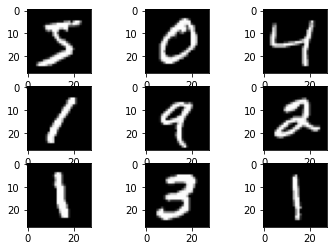

In [ ]:
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))


Above are examples of what an image in our dataset looks like. Now let's flatten the pixel data arrays so that we can run our models on them:

In [ ]:
train_X_flat = []
for i in range(len(train_X)):
  train_X_flat.append(train_X[i].flatten())

In [ ]:
test_X_flat = []
for i in range(len(test_X)):
  test_X_flat.append(test_X[i].flatten())

#Model Selection

We will comparing three classification models: Convolutional Neural Networks (CNN), Support Vector Machines (SVM), and K-Nearest Neighbors (KNN). With the data that we gather, we will measure their accuracy and determine the best performing model to be the one with the greatest accuracy.

##1. K-Nearest Neighbors

Source: https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm


We will create a new KNN classifier, setting n-neighbors to 10. If 6 out of 10 nearest neighbors are classified as digit "2", then this datapoint will also be classified as digit "2".

In [ ]:
#Training Model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(train_X_flat, train_y)

KNeighborsClassifier(n_neighbors=10)

The predict function makes predictions on test data and stores the result as an array, where each element represents a predicted digit.

In [ ]:
#Prediction

y_pred = classifier.predict(test_X_flat)

In [ ]:
print(y_pred)

[7 2 1 ... 4 5 6]


The predict function makes predictions on test data. The confusion matrix here shows how many digits got classified as each type of digit. For example, digit 0 was classified as "0" 972 times, never as "1", thirteen times as digit "2", and never as digit "3". Digit "1" was classified as as "0" once, as digit "1" 1132 times, and as digit "2" twelve times. The precision for each digit remained between 0.95 and 0.99, and recall between 0.95 and 1.00. The important information that we gain from this calculation is the accuracy: it is determined to be 0.9665, or 96.65%.

In [ ]:
#Print Results

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(test_y, y_pred)

print("Confusion Matrix:")
print(result)

result1 = classification_report(test_y, y_pred)
print("Classification Report:",)
print(result1)

result2 = accuracy_score(test_y,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 972    1    1    0    0    2    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  13   12  982    2    1    0    2   17    3    0]
 [   0    3    3  976    1   10    1    7    6    3]
 [   2   11    0    0  940    0    4    1    1   23]
 [   4    0    0   12    1  863    6    1    1    4]
 [   6    4    0    0    3    2  943    0    0    0]
 [   0   27    4    0    2    0    0  983    0   12]
 [   6    4    5   11    7    9    4    7  914    7]
 [   7    6    3    7   10    3    1   10    2  960]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98      

##2. Support Vector Machines

Initial attempts to execute SVM on this database were unsuccessful as the model attempted to fit for hours on end. Eventually, modifications were made to the model in an attempt to reduce runtime. These include scaling the data and reducing the C paramater (which lowers the misclassification rate of the model but increases runtime) to 1/10 of its original value.

Source: 

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python


https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution


In [ ]:
#Import svm model
from sklearn import svm

#Scale our data
from sklearn import preprocessing
train_X_scaled = preprocessing.scale(train_X_flat)
test_X_scaled = preprocessing.scale(test_X_flat)

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=0.1) # Linear Kernel

#Train the model using the training sets
clf.fit(train_X_scaled, train_y)

#Predict the response for test dataset
pred_y = clf.predict(test_X_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Score : ", metrics.precision_score(test_y, pred_y, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Score : ", metrics.recall_score(test_y, pred_y, average='macro'))

Accuracy: 0.9376
Precision Score :  0.9372256008557274
Recall Score :  0.9365448727601307


##3. Convolutional Neural Network
The input layer into the Convolutional Neural Network that we created uses the train_X data. The train_X data and test_X data represent the data of the images. They have been converted into numpy arrays in order to be used to create the model. train_Y represents all the actual number values of the images from the train part of the dataset.

Source: https://medium.datadriveninvestor.com/my-take-at-the-mnist-dataset-97304dff2057

In [ ]:
# categorizing the data into the 10 numbers in the dataset
train_y_matrix = to_categorical(y = train_y, num_classes = 10)

In this step, I utilized the to_categorical to convert the train_y into a one-hot encoded matrix. This converts the train_y array from ``[5, 0, 4, ..., 5, 6, 8]`` format to ``[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]`` format. The one in this array represents that the first row of train_y represents the number 1.

In [ ]:
# creating shape variable (removing the first index since that is not actually part of the shape, it's actually the number of images in the training dataset)
inputShape = np.shape(train_X)
inputShape = (inputShape[1], inputShape[2], 1)
inputShape

(28, 28, 1)

I am creating the shape variable of the train_X variable. I am removing the first index, since it is simply a count of the number of images in the training dataset.

In [ ]:
# creating the actual model using sequential
model = Sequential()

model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = inputShape)) # convolution layer 1
model.add(MaxPooling2D(pool_size = (2,2))) # pooling the data
model.add(Conv2D(64, kernel_size = (5,5), activation = 'relu')) # convolution layer 2
model.add(MaxPooling2D(pool_size = (2,2))) # pooling the data once again
model.add(Flatten()) # flattening the data
model.add(Dropout(0.25)) # performing drop out to regularize the data
model.add(Dense(100, activation = 'relu')) # applying ReLu activation function to the data
model.add(Dense(10, activation = 'softmax')) # applying softmax activation function to the data

In this step I am actually building the convolutional neural network.

Steps:
1. Add a convolution layer with 1 input layer and 32 output channels. I set the Kernel Size to be 5 by 5, which is the dimensions of the 2D convolution window. The activation function in this case is labeled as ReLu.
2. Next, I use a 2 by 2 max pooling to reduce the spatial dimensions of the output from the previous convolution layer step
3. Add another convolution layer with 32 input layer and 64 output channels. I also set the Kernel Size to be 5 by 5, which again is the dimensions of the 2D convolution window. The activation function in this case is once again labeled as ReLu.
4. Next, I use a 2 by 2 max pooling again to reduce the spatial dimensions of the output from the previous convolution layer step
5. After applying all those convolution layers, I need to flatten the data so that it can be passed into the next layers so that the network can be narrowed down into categorizing the image into one of the 10 number categories
6. I apply a dropout function with 25% probability of dropping to reduce overfitting between the layers
7. The dense layer that comes up next condenses the data into the size of 100 using the ReLu activation function
8. The last layer, another dense layer, condenses the data into the size of 10 using the SoftMax activation function so that images can categorized into one of the ten numbers (0 to 9)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

Here, I am utilizing a categorical cross entropy loss function to have a better understand how well this convolutional neural network performed the task of digit recognition. I used cross entropy since I am dealing with a multi class classification.

In [ ]:
# Keras is expecting 4 dimensions so this will expand the dimensions
# categorizing the data into the 10 numbers in the dataset
train_X_Inflated = np.expand_dims(train_X, axis = 3)

Before being able to fit the training data to our model, I needed to expand the dimensions.

In [ ]:
# fitting the CNN model to our training data
model.fit(train_X_Inflated, train_y_matrix, epochs = 10, batch_size = 1000)

Epoch 1/10
60/60 [==============================] - 12s 40ms/step - loss: 3.7458 - accuracy: 0.6205
Epoch 2/10
60/60 [==============================] - 2s 40ms/step - loss: 0.2958 - accuracy: 0.9098
Epoch 3/10
60/60 [==============================] - 2s 40ms/step - loss: 0.1738 - accuracy: 0.9468
Epoch 4/10
60/60 [==============================] - 2s 40ms/step - loss: 0.1291 - accuracy: 0.9602
Epoch 5/10
60/60 [==============================] - 2s 40ms/step - loss: 0.1035 - accuracy: 0.9681
Epoch 6/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0889 - accuracy: 0.9725
Epoch 7/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0776 - accuracy: 0.9759
Epoch 8/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0706 - accuracy: 0.9776
Epoch 9/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0632 - accuracy: 0.9795
Epoch 10/10
60/60 [==============================] - 2s 40ms/step - loss: 0.0580 - accuracy: 0.9819


I fitted the training data to the convolutional neural network in this step. I included 10 epochs, which is running the entire model over the training data 10 times to increase the end accuracy of the model. I included a batch size of 1000.

In [ ]:
# Keras is expecting 4 dimensions so this will expand the dimensions
test_X_inflated = np.expand_dims(test_X, axis = 3)
test_y_matrix = to_categorical(test_y, num_classes = 10)

In this step, I expanded the dimensions of the test set x and updated the test set y to one-hot categorical. These are the necessary conversions required to run them through the model.

In [ ]:
# gathering the predictions
predict_x=model.predict(test_X_inflated) 
classes_x=np.argmax(predict_x,axis=1)

print("y_train shape: {}".format(np.shape(train_y_matrix)))
print("x_train shape: {}".format(np.shape(train_X_Inflated)))

print("y_test shape: {}".format(np.shape(test_y_matrix)))
print("x_test shape: {}".format(np.shape(test_X_inflated)))

y_train shape: (60000, 10)
x_train shape: (60000, 28, 28, 1)
y_test shape: (10000, 10)
x_test shape: (10000, 28, 28, 1)


In this step I made the predictions by utilizing the inflated test x set.

In [ ]:
# evaluate the accuracy and loss of the CNN model
evaluate = model.evaluate(test_X_inflated, test_y_matrix)
print("Loss: {}".format(evaluate[0]))
print("Accuracy: {}".format(evaluate[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0368 - accuracy: 0.9871
Loss: 0.0368431992828846
Accuracy: 0.9871000051498413


By using the evaluation function of model, I found the accuracy to be 98.98% accurate. There was a loss of 0.03968.

### Comparing Results to Predictions

In [ ]:
print(classes_x)
tempList = []

#this loop iterates through y_test and converts a format so we can compare to our predictions
for row in test_y_matrix:
    tempClass = np.argmax(row)
    tempList.append(tempClass)


test_y_Classes = np.array(tempList)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


I converted the test y set so it can be compared to the predictions I made.

In [ ]:
wrongPredictionIndices = []
i = 0

for actual, prediction in zip(test_y_Classes, classes_x):
    if actual != prediction:
        wrongPredictionIndices.append(i)
    i = i + 1

# these are the ten of indices of all the wrong predictions done by CNN
wrongPredictionIndices[:10]

I collected all the indices of the wrongfully made predictions and presented them in the format of the array.

**Accuracy Table**

|Model | Accuracy |
|------|----------|
|**KNN**   | 96.65% |
|**SVM**   | 93.76% |
|**CNN**   | 98.88% |

# Conclusion
Of the three models we built for the MNIST dataset (KNN, SVM, and CNN), CNN had the highest accuracy at 98.9%. In addition, while SVM was very slow to complete and runs ever slower as dataset size increases, CNN was quick to execute. KNN was similar in speed but had a slightly lower accuracy. Therefore, the model that performed the best on this dataset was CNN.

A real world application of our project could be used for a site like Ancestry.com. By applying our project to this site, individuals could upload old family documents to the database to help assist them in researching their own family tree. However, this is only the tip of the iceberg - there are many handwritten documents that have yet to be digitized. Once they are, they will be available to the public, and computers can scan them and recommend potentially useful information to users. In the era of big data, the need for more data is ever increasing. By providing this new source of digitized data, greater predictions could be made in multitudes of applications like in insurance policies or even zoning decisions made by local governments. Digitizing documents is currently a slow process. It is currently done mostly by hand where the document is manually read and typed out, but progress can become much more efficient with reliable script to text algorithms.

## Next Steps
By recognizing particular numbers, we can scale this algorithm to recognize letters as well. The ability to classify both numbers and letters would allow us to develop a computer algorithm that would accurately digitize handwritten documents and find meaningful insights from them. We would also continue to expand our search in terms of the best models to be used for actual practical application. Additionally, the search for more data sets will be part of our next steps.

## Future Research
For future research, it would be valuable to include other metrics to compare models by. Another important area of research would be expanding the dataset to include letters. If research in script to text algorithms is desired, expanding the dataset would allow us to determine which algorithm is best for classifying letters. Having datasets in other languages would also be another large area of research in the field of linguistics. As is apparent by the diversity of applications that we have discussed so far, our project can be applied to a variety of areas of research.